# The Perceptron 

We will implement percentron on the iris data set. 

1) We will use Perceptron from the sklearn library.

2) We will write our own code for the perceptron algorithm from scratch. 

---

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Import a function for plotting decision boudaries
# !pip install mlxtend
from mlxtend.plotting import plot_decision_regions

In [3]:
# Read the iris dataset into a pandas DataFrame object
df = pd.read_csv("iris_dataset.csv")

In [4]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.3+ KB


In [6]:
df['species'].value_counts()

setosa        50
virginica     50
versicolor    50
Name: species, dtype: int64

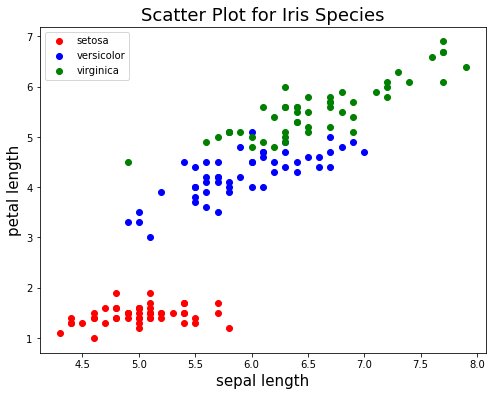

In [7]:
df1 = df[df.species=="setosa"]
df2 = df[df.species=="versicolor"]
df3 = df[df.species=="virginica"]

plt.figure(figsize = (8, 6))
plt.scatter(df1.sepal_length, df1.petal_length, color="red", label="setosa")
plt.scatter(df2.sepal_length, df2.petal_length, color="blue", label="versicolor")
plt.scatter(df3.sepal_length, df3.petal_length, color="green", label="virginica")
plt.title("Scatter Plot for Iris Species", fontsize = 18)
plt.xlabel("sepal length", fontsize=15)
plt.ylabel("petal length", fontsize=15)
plt.legend();

---

Notice from the above scatter plot that according to these two features (sepal length and petal length), 
setosa and versicolor are linearly separable. We will implement percentron for these two species and these two features.

---

In [8]:
# We need only setosa and versicolor which are the first 100 rows

df = df.iloc[:100]
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,versicolor
96,5.7,2.9,4.2,1.3,versicolor
97,6.2,2.9,4.3,1.3,versicolor
98,5.1,2.5,3.0,1.1,versicolor


---

The perceptron can take any number of inputs (features), but for simplicity we will consider two inputs: "sepal length" and "petal length". 

---

In [9]:
X = df[["sepal_length", "petal_length"]]

X

,sepal_length,petal_length
0,5.1,1.4
1,4.9,1.4
2,4.7,1.3
3,4.6,1.5
4,5.0,1.4
...,...,...
95,5.7,4.2
96,5.7,4.2
97,6.2,4.3
98,5.1,3.0


---

We will also convert the labels "setosa" and "versicolor" to numerical values: "setosa" to -1 and "versicolor" to +1. 

---

In [10]:
# Store the labels in y
y = df['species']

# We can leave the original labels and use sklearn perceptron,
# but to use mlxtend for plotting we need to encode the labels
# setosa = -1, versicolor = 1

y = np.where(y == 'setosa', -1, 1)

y

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

---

## 1) Sklearn Perceptron

In [11]:
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html
from sklearn.linear_model import Perceptron

In [12]:
# Instantiate one instance of the Perceptron class
clf = Perceptron()

# Fit the model to the training data
clf.fit(X, y)

Perceptron()

In [13]:
# Compute predict labels on X
y_pred = clf.predict(X)
y_pred

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [14]:
# Actual labels
y

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [15]:
# Compare actual and predicted labels
print(y == y_pred)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True]


In [16]:
clf.coef_   # weights

array([[-5. , 10.9]])

In [17]:
clf.intercept_  # bias 

array([-2.])

In [18]:
X

,sepal_length,petal_length
0,5.1,1.4
1,4.9,1.4
2,4.7,1.3
3,4.6,1.5
4,5.0,1.4
...,...,...
95,5.7,4.2
96,5.7,4.2
97,6.2,4.3
98,5.1,3.0


In [19]:
X.to_numpy()

array([[5.1, 1.4],
       [4.9, 1.4],
       [4.7, 1.3],
       [4.6, 1.5],
       [5. , 1.4],
       [5.4, 1.7],
       [4.6, 1.4],
       [5. , 1.5],
       [4.4, 1.4],
       [4.9, 1.5],
       [5.4, 1.5],
       [4.8, 1.6],
       [4.8, 1.4],
       [4.3, 1.1],
       [5.8, 1.2],
       [5.7, 1.5],
       [5.4, 1.3],
       [5.1, 1.4],
       [5.7, 1.7],
       [5.1, 1.5],
       [5.4, 1.7],
       [5.1, 1.5],
       [4.6, 1. ],
       [5.1, 1.7],
       [4.8, 1.9],
       [5. , 1.6],
       [5. , 1.6],
       [5.2, 1.5],
       [5.2, 1.4],
       [4.7, 1.6],
       [4.8, 1.6],
       [5.4, 1.5],
       [5.2, 1.5],
       [5.5, 1.4],
       [4.9, 1.5],
       [5. , 1.2],
       [5.5, 1.3],
       [4.9, 1.5],
       [4.4, 1.3],
       [5.1, 1.5],
       [5. , 1.3],
       [4.5, 1.3],
       [4.4, 1.3],
       [5. , 1.6],
       [5.1, 1.9],
       [4.8, 1.4],
       [5.1, 1.6],
       [4.6, 1.4],
       [5.3, 1.5],
       [5. , 1.4],
       [7. , 4.7],
       [6.4, 4.5],
       [6.9,

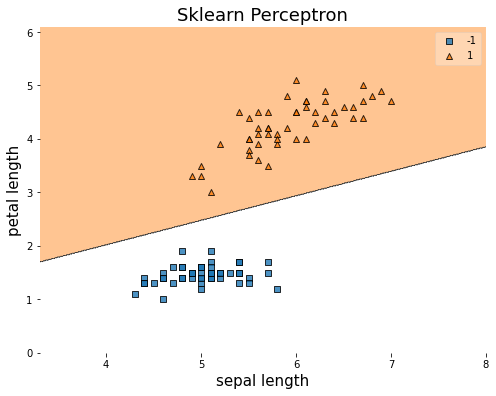

In [20]:
plt.figure(figsize = (8, 6))
plot_decision_regions(X.to_numpy(), y, clf = clf)
plt.title("Sklearn Perceptron", fontsize = 18)
plt.xlabel("sepal length", fontsize = 15)
plt.ylabel("petal length", fontsize = 15);

In [21]:
# We can use this classifier to predict the species of a flower with measurements 6 (sepal length) and 1 (petal length.)
# Obviously from the graph, the label should be -1. 

clf.predict([[6, 1]])

array([-1])

---

## 2) Our own custom class for the perceptron algorithm


Recall, that python classes store data as class attribute and functions as class methods.
The perceptron class we will create will store a learning rate $\eta$, the number of iterations (epochs) $T$ when training, the weights $w_1$, $w_2$ and bias $b$, and the error incured during training at each iteration. This class will also contain input method, fit method, and predict method.  

In [22]:
X = df[["sepal_length", "petal_length"]].to_numpy()

X

array([[5.1, 1.4],
       [4.9, 1.4],
       [4.7, 1.3],
       [4.6, 1.5],
       [5. , 1.4],
       [5.4, 1.7],
       [4.6, 1.4],
       [5. , 1.5],
       [4.4, 1.4],
       [4.9, 1.5],
       [5.4, 1.5],
       [4.8, 1.6],
       [4.8, 1.4],
       [4.3, 1.1],
       [5.8, 1.2],
       [5.7, 1.5],
       [5.4, 1.3],
       [5.1, 1.4],
       [5.7, 1.7],
       [5.1, 1.5],
       [5.4, 1.7],
       [5.1, 1.5],
       [4.6, 1. ],
       [5.1, 1.7],
       [4.8, 1.9],
       [5. , 1.6],
       [5. , 1.6],
       [5.2, 1.5],
       [5.2, 1.4],
       [4.7, 1.6],
       [4.8, 1.6],
       [5.4, 1.5],
       [5.2, 1.5],
       [5.5, 1.4],
       [4.9, 1.5],
       [5. , 1.2],
       [5.5, 1.3],
       [4.9, 1.5],
       [4.4, 1.3],
       [5.1, 1.5],
       [5. , 1.3],
       [4.5, 1.3],
       [4.4, 1.3],
       [5. , 1.6],
       [5.1, 1.9],
       [4.8, 1.4],
       [5.1, 1.6],
       [4.6, 1.4],
       [5.3, 1.5],
       [5. , 1.4],
       [7. , 4.7],
       [6.4, 4.5],
       [6.9,

In [27]:
class MyPerceptron(object):
    def __init__(self, eta = 0.5, epochs = 50):
        self.eta = eta
        self.epochs = epochs
        
    def fit(self, X, y):
        self.w1 = np.random.rand(1)
        self.w2 = np.random.rand(1)
        self.b = np.random.rand(1)
        
        self.errors = []
        
        for _ in range(self.epochs):
            errors = 0
            for xi, yi in zip(X, y):
                update = self.eta * (self.predict(xi) - yi)
                self.w1 = self.w1 - update*xi[0]
                self.w2 = self.w2 - update*xi[1]
                self.b = self.b - update
                errors = errors + int(update != 0)
            if errors == 0:
                return self
            else:
                self.errors.append(errors)
            
        return self
    
    def weighted_sum(self, x):
        self.w = np.array([self.w1, self.w2])
        return np.dot(x, self.w) + self.b
    
    def predict(self, x):
        return np.where(self.weighted_sum(x) > 0.0, 1, -1)

In [28]:
np.random.rand(1)

array([0.05303374])

In [29]:
int(0.23 != 0)

1

In [30]:
# Instantiate one instance of My_Perceptron class
my_clf = MyPerceptron()

# Call the fit method 
my_clf.fit(X, y)

In [31]:
# Predict labels on X
y_pred = my_clf.predict(X)
y_pred

array([[-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],

In [32]:
y

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [33]:
y_pred = y_pred.reshape(100)
y_pred

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [34]:
# Compare actual and predicted labels
print(y == y_pred)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True]


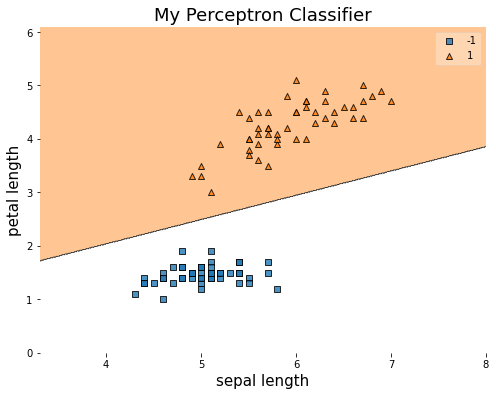

In [35]:
plt.figure(figsize = (8, 6))
plot_decision_regions(X, y, clf = my_clf)
plt.title("My Perceptron Classifier", fontsize = 18)
plt.xlabel("sepal length", fontsize = 15)
plt.ylabel("petal length", fontsize = 15);

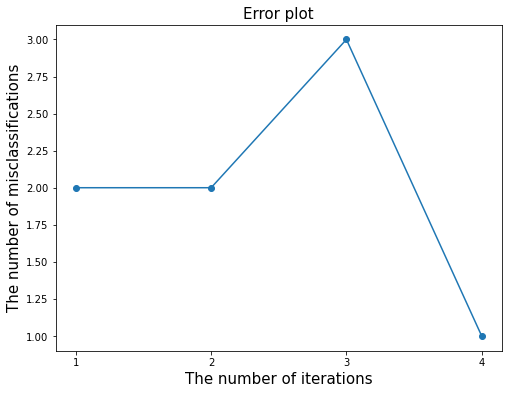

In [39]:
# We plot the errors for each iteration
# We also see the number of iterations needed for the algorithm to find the classifier

plt.figure(figsize = (8, 6))
plt.plot(range(1, len(my_clf.errors)+1), my_clf.errors, 
         marker = "o")
plt.title("Error plot", fontsize = 15)
plt.xlabel("The number of iterations", fontsize = 15)
plt.ylabel("The number of misclassifications", fontsize = 15)
plt.xticks(range(1, len(my_clf.errors)+1))
plt.show()

---

## HW 1 due Monday 1/30 at 11:59pm:

### Please email your code to me kjegdic@cougarnet.uh.edu

### Please write your name and your student ID in the email


---


(a) We mentioned that perceptron converges if the data is linearly separable. Try sklearn perceptron model for versicolor and virginica, with sepal length and petal length. What do you observe? 

(b) We created My_Perceptron class for only 2 inputs. Extend this code for 3 inputs. Investigate the iris data set and choose 3 features to classify setosa and versicolor using your code. Notice that you cannot easily plot the decision boundary now since the data is 3-dimensional, but you can still compare the actual and the predicted labels to see how your algorithm is performing. 

(c) Try to generalize My_Perceptron code so it could be used for any number of inputs. 
(Hint: Recall, that for a list ```w``` we can use ```w[-1]``` and ```w[:-1]``` to access the last value in the list and all the values expect the very last value. Also, use ``` np.dot```, NumPy dot product, to compute the pre-activation value of $z$.)

---

In [40]:
my_clf.w

array([[-3.43054397],
       [ 7.74808603]])

In [42]:
my_clf.b

array([-1.77813653])

In [41]:
clf.coef_

array([[-5. , 10.9]])

In [43]:
clf.intercept_

array([-2.])